# Turbulence Final Project

Anna Scott

JHU

Dec 2015

# Some motivation

The problem: characterizing heat in an urban environment for health and policy applications. 

## Heatwaves

Heat can harm by causing dehydration, stressing the cardiovascular and nervous system, and worsening pre-existing disease symptoms. 

Heatwaves, extended periods of elevated heat and humidity, are deadly, and a growing problem.

In [ ]:
# show WMO figure

## Urban Heat Island 

A spatial phenomenon called the urban heat island effect compounds this problem: urban areas tend to be hotter than rural areas. The effect is most pronounced at night, so is linked to differences in cooling rates. 

In [ ]:
# show picture of time

## Urban Heat Island

 The effect is most pronounced at night, so is linked to differences in cooling rates. 

In [ ]:
# show diurnal cycle of UHI

Furthermore, flow in the boundary layer is turbulent: (calculate the Reynolds number.)  It's also complicated by boundary conditions that are difficult to quantify or observe, like surface temperatures and moisture availability. 

# The atmospheric boundary layer

definitions: viscous sublayer, x layer, mixed layer, ABL

# Heat transport in a turbulent flow

Heat transport in turbulent flows is governed by conservation of enthalpy. This gives the heat equation 
$ \frac{d\theta}{dt} = ...$ where $\theta$ is the potential temperature, a conserved quantity for dry adiabatic processes (). Potential temperature can be thought of as the temperature a parcel of air would have if you lowered it (instantly) to the ground without adding or subtracting moisture. 

In a turbulent flow, we can use Reynolds averaging to turn this into: 
We can combine this with the familiar turbulent flow equations: 
Leaving us with our familiar closure problem. 

# Turbulence closure in the atmospheric Boundary Layer 

local models: k-theory/gradient transport theory: Use the Boussinesq approximation to write temperature fluxtuations as an eddy diffusivity: 
$ \frac{d}{dx}\overline{w^\prime \Theta ^\prime} = K \frac{d \Theta}{dz}$

Note that this breaks down in jet-like flows as it allows for a counter-gradient heat or momentum flux, so it is sometimes modified to : $\overline{w^\prime \Theta ^\prime} = -K \left( \frac{d \Theta}{dz} - \gamma \right)$, where $\gamma_0$ is a correction term that can be calculated (Deardorff 1973). 

This isn't relevant for this application though- while nocturnal jets can be quite strong over the continental US, they lie right on top of the night-time inversion layer. 
Mixing length theory



In [ ]:
A small note on non-local models

# A 2 layer model for urban heat transport

Consider a box model above an urban surface. The heat balance $Q_{net}$ is given as a function of the radiative imbalance,
$$\epsilon_{surface} \sigma T_{surface}^4 -\epsilon_{air} \sigma T_{air}^4$$

the mean and turbulent flow budget
$$\rho c_p \frac{\partial}{\partial x_i} \left( \overline{\Theta U_i} + \overline{\theta^\prime u^\prime} \right) $$
and the latent heat flux
$$\rho c_T L_v U \nabla q$$

We can make some simplifying assumptions: let's assume the flow is homogeneous in the $y$-direction, leaving only the $x$- and $z$- directions. Further assume that only vertical fluxes of moisture are important. 
Then energy budget is then: 
$$ \Delta Q =\epsilon_{surface} \sigma T_{surface}^4 -\epsilon_{air} \sigma T_{air}^4+ \rho c_p \frac{\partial}{\partial x_i} \left( \overline{\Theta U_i} + \overline{\theta^\prime u_i^\prime} \right) + \rho c_T L_v U_i \frac{\partial}{\partial x_i} q_i $$ 

We can use the boundary layer closure for the vertical fluxes so that $\frac{\partial}{\partial z} \overline{w^\prime \Theta^\prime} = -k_n \frac{\partial \theta}{\partial z} $

Given some temperature, relative humidity and windspeed data, we can calculate the nightime energy budget, when conditions are stable and so $u$ and $w$ are small. First calculate the radiative budget, using $\sigma = 5.6 \times 10^{-8}$: 
$$\epsilon_{surface} \sigma T_{surface}^4 -\epsilon_{air} \sigma T_{air}^4 \approx \sigma .85 (300)^4 -\sigma .25 (290)^4 = 290 W/m^2$$

In [55]:
sigma*(.85*300**4-.25*290**4)

290.1377686425

The turbulent fluxes for dry air can be divided up into horizontal and vertical fluxes:   
$$ \rho c_p \frac{\partial}{\partial x_i} \left( \overline{\Theta U_i} + \overline{\theta^\prime u^\prime} \right) 
\approx \rho c_p 
\left( U \frac{d \Theta}{dx} + \frac{\partial}{\partial x} \overline{\theta ^\prime u^\prime} + 
W\frac{d \Theta}{dz} + \frac{\partial}{\partial z} \overline{\theta ^\prime v^\prime} \right)$$

Using $\rho c_p \approx 1000 J m^-3 ^\circ K^-1$, 
$$ \rho c_p U \frac{\partial \theta}{\partial x} = 1000* .1*\frac{1^\circ K}{100m} = 8 W/m^2$$
 
Using the turbulence closure of K=, The vertical fluxes are treated as: 

In [64]:
U_bar = amazinggracedf.windSpeed[amazinggracedf.index.hour == 6].mean()
1000*.8*1/100

8.0

In [1]:
## Import data for calculations
# import data
import numpy as np
import matplotlib.pyplot as plt
from math import *
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline

# import temperature data
files = glob.glob('./data/*[tT].csv')
meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames).resample('H')
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

# import humidity data 
rhDF0, rhanomalyDF0, meta0 = importibuttondata.importdata(glob.glob('./data/*[hH].csv'), meta0)
rhDF1, rhanomalyDF1, meta1 = importibuttondata.importdata(glob.glob('./data/falldownload/*[hH].csv'), meta1)
frames = [rhDF0, rhDF1]
rhDF = pd.concat(frames).resample('H')
rhanomalyDF = pd.concat([rhanomalyDF0, rhanomalyDF1])

# Import Science Center observation data
date_spec = {'Date': [2, 3]}
urbandf = pd.read_csv('./data/observations/urban/2138216847366dat.csv', 
                      sep = ',', 
                      parse_dates = {'Date':[2, 3]},
                      #parse_dates = ['YYYYMMDD', 'HHM'],
                      keep_date_col=True).set_index('Date')
#urbandf.Temp[urbandf.Temp == '****'] = 'NaN' # replace stars with nans
urbandf.Temp = (urbandf.Temp.astype('float')) #-32)*5/9. #change the data to float
urbandf.Temp[urbandf.Temp > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
urbandf = urbandf[~((urbandf.index.month == 2) & (urbandf.index.day == 29))] # get rid of leap years
urbandf.windSpeed = urbandf.windSpeed
urbandf = urbandf.resample('H')
urbandf.rename(columns = {'Temp' : 'TEMP'}, inplace = True)
urbandf.index = urbandf.index - pd.DateOffset(hours  = 4)

import sqlite3
conn = sqlite3.connect('amazinggrace-weewx.sdb')
amazinggracedf = pd.read_sql_query('SELECT * from archive', conn)
amazinggracedf['dateTime']=pd.to_datetime(amazinggracedf['dateTime'], unit='s')
amazinggracedf.outTemp = (amazinggracedf.outTemp-32)*5./9.
amazinggracedf = amazinggracedf.set_index('dateTime')
amazinggracedf.index = amazinggracedf.index - pd.DateOffset(hours  = 5)

conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

amazinggracedf = amazinggracedf[amazinggracedf.index.minute ==0]#amazinggracedf.resample('H')
olinhalldf = olinhalldf[olinhalldf.index.minute ==0]

importibuttondata.py:28: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  meta = meta.sort(axis=0) # sort the data in order of the sensor number
importibuttondata.py:63: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  anomalyDF = pd.DataFrame(anomaly, tempDF.index, tempDF.columns).sort(axis=1)
/Users/annascott2/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
startdate = '2015-08-17'
enddate = '2015-08-19'
impervious = [27, 85]
pattersonhi = [119, 14]
pattersonlo = [30, 52]

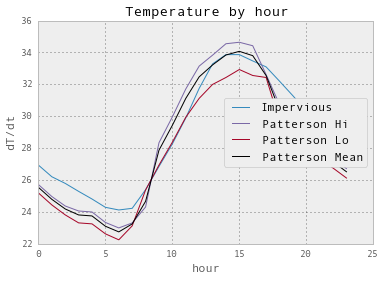

In [298]:
impervious = [27, 85,71]
pattersonhi = [119, 14]
pattersonlo = [30, 174]#, 52]
plt.plot(x, tempDF[startdate][impervious].mean(axis=1),
        x,tempDF[startdate][pattersonhi].mean(axis=1), 
         x, tempDF[startdate][pattersonlo].mean(axis=1),
        x, tempDF[startdate][np.union1d(pattersonlo, pattersonhi)].mean(axis=1), 'k')
plt.xlabel('hour')
plt.ylabel('dT/dt')
plt.title('Temperature by hour')
plt.legend(['Impervious', 'Patterson Hi', 'Patterson Lo', 'Patterson Mean'], loc =5)

In [34]:
# Relative humidity budget
rho = 1.225 #kg/m^3, air density
c_p = 1.005e3 #J/kg/K, specific heat of air
L = 2256#kJ/kg latent heat of vaporization
C_T = .1 # stanton number
T = tempDF[startdate]
RH = rhDF[startdate] 
q_surf = np.ones(24)*.35 #np.array([.5, .5,.5, .5, .5, .5, .5, .5,0.4,0.3,0.3,0.3,0.3, 0.3,0.3,0.3,0.4,0.4,0.4,0.4,.5,.5,.5,.5 ])
e_s = 6.1094*np.exp(17.625*T/(T+243.04))
p = np.tile(amazinggracedf[startdate][amazinggracedf[startdate].index.minute ==0]['pressure'], [e_s.shape[1],1]).T
U = np.tile(amazinggracedf[startdate][amazinggracedf[startdate].index.minute ==0]['windGust'], [e_s.shape[1],1]).T

qDF = RH/100*0.622*e_s/p
Q_humidity = -rho*L*U*C_T* (qDF-np.tile(q_surf,[qDF.shape[1],1]).T)

In [48]:
# Radiation budget
sigma =  5.6703e-8 # W.m^-2.K^(-4), Stefan-Boltmann constant
epsilon_s = .85# surface emissivity of concrete
epsilon_a =  .15# emissivity of air ??? 
#T_s = 35+273.15 # mean+1 SD of surface temperature of the area on August 18
T_s = np.array(np.ones(24)*308.15) - np.array([30,30,30,30,30,30, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 5,10,15])
Q_r = epsilon_s *sigma * np.tile(T_s, [T.shape[1],1]).T**4 - epsilon_a * sigma *(T+273.15)**4

In [27]:
# Turbulent transport fluxes
#K_n = 1
U = amazinggracedf[startdate][amazinggracedf[startdate].index.minute ==0]['windSpeed']
T_s = np.array(np.ones(24)*308.15) - np.array([30,30,30,30,30,30, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 5,10,15])
dT = T[impervious].mean(axis=1)- T[pattersonhi].mean(axis=1)
dz = 5 #meters, distance from ground up
dx = 200
Q_transport = rho*c_p*((T+273.15- np.tile(T_s, [T.shape[1],1]).T)[impervious].mean(axis=1)/dz + (U*dT/dx).values[:])  #-K_n*(T-T_s)/dz + U*dT/dx)
Q_transport = rho*c_p*((U*dT/dx).values[:])  #-K_n*(T-T_s)/dz + U*dT/dx)
#Q_transport

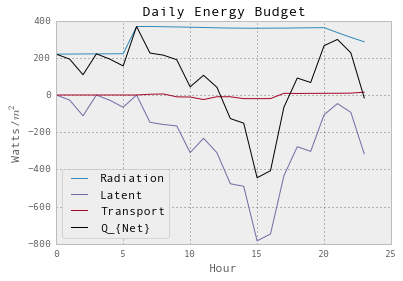

In [49]:
x = tempDF[startdate].index.hour
Q_net = Q_r[impervious].mean(axis=1)+ Q_transport + Q_humidity[impervious].mean(axis=1) 
plt.plot(x, Q_r[impervious].mean(axis=1), label = 'Radiation')
plt.plot(x, Q_humidity[impervious].mean(axis=1), label = 'Latent')
plt.plot(x, Q_transport, label ='Transport')
plt.plot(x, Q_net, 'k', label = 'Q_{Net}')
plt.legend(loc = 3)
plt.xlabel('Hour')
plt.ylabel('Watts/$m^2$')
plt.title('Daily Energy Budget')

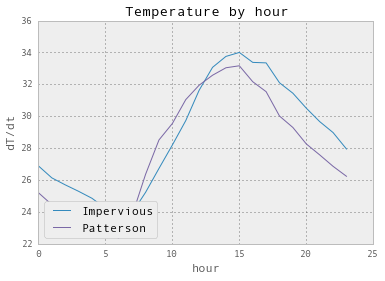

In [7]:
plt.plot(x,tempDF[startdate][impervious].mean(axis=1), 
         x, tempDF[startdate][pattersonlo].mean(axis=1))
plt.xlabel('hour')
plt.ylabel('dT/dt')
plt.title('Temperature by hour')
plt.legend(['Impervious', 'Patterson'], loc =3)

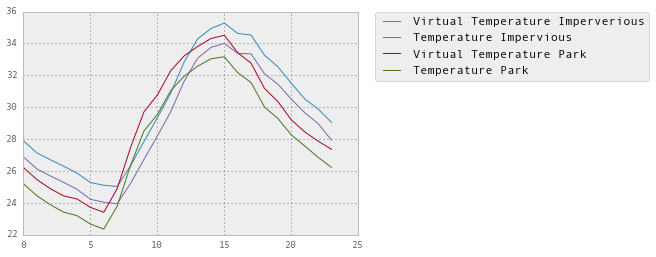

In [29]:
# virtual temperature
T_v = T+L*qDF/c_p
plt.plot(T_v[impervious].mean(axis=1), label = 'Virtual Temperature Imperverious')
plt.plot(T[impervious].mean(axis=1), label = 'Temperature Impervious')
plt.plot(T_v[pattersonlo].mean(axis=1), label = 'Virtual Temperature Park')
plt.plot(T[pattersonlo].mean(axis=1), label = 'Temperature Park')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

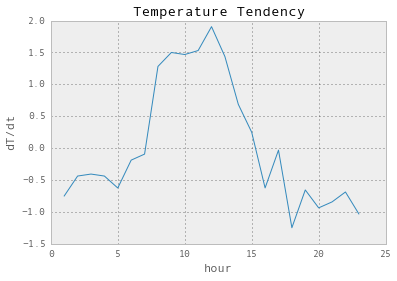

In [232]:
plt.plot(x[1:],tempDF[startdate][impervious].mean(axis=1)[1:] - tempDF[startdate][impervious].mean(axis=1)[:-1].values)
plt.plot(x[1:],tempDF[startdate][pattersonlo].mean(axis=1)[1:] - tempDF[startdate][pattersonlo].mean(axis=1)[:-1].values)
plt.xlabel('hour')
plt.ylabel('dT/dt')
plt.title('Temperature Tendency')
plt.legend(['Impervious', 'Patterson'], loc =3)

In [278]:
pattersonlo = [30, 174, 52]
pattersonhi = [175, 119, 14]
plt.figure(figsize = [15,5])
startdate = '2015-07-10'
enddate = '2015-07-15'
#plt.plot(tempDF[startdate:enddate].index, tempDF[startdate:enddate][pattersonlo].mean(axis=1), label = 'patterson low')
plt.plot(tempDF[startdate:enddate].index, 
         tempDF[startdate:enddate][pattersonhi].mean(axis=1)- tempDF[startdate:enddate][pattersonlo].mean(axis=1),
         label = 'difference')# 'patterson high')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(0)

tempDF[startdate:enddate][pattersonhi].mean(axis=1).groupby(tempDF[startdate:enddate].index.hour).mean().plot(label = 'Patterson hi')
tempDF[startdate:enddate][pattersonlo].mean(axis=1).groupby(tempDF[startdate:enddate].index.hour).mean().plot(label = 'Patterson lo')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

hour = 16
ax = WindroseAxes.from_ax()
ax.bar(olinhalldf[olinhalldf.index.hour==hour][startdate:enddate].windDir, olinhalldf[olinhalldf.index.hour==hour][startdate:enddate].windSpeed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Olin Hall Summer windspeed, %i o\'clock'%hour)

ax = WindroseAxes.from_ax()
ax.bar(amazinggracedf[amazinggracedf.index.hour==hour][startdate:enddate].windDir, 
       amazinggracedf[amazinggracedf.index.hour==hour][startdate:enddate].windGust, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Amazing Grace Summer windspeed, %i o\'clock'%hour)

ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

In [67]:
amazinggracedf.windSpeed.mean(), olinhalldf.windSpeed.mean()

(1.5211849810540821, 0.88778772378516624)

testing the notes capability